
## ALL



## Hong Real Gen

* Gen new data with real model

tensor([[2054.3281,  633.9849,   32.9984]])

tensor([[2468.8032, 1781.9651,  110.9102]])


## Web application (NOT deployed yet)

Run interactively on the web at: 




## Inputs



(2, 'i_h2i_rate')

(3, 'i_pci_rate')

(5, 'i_ngi_rate')

(6, 'i_o2_volfract')

(8, 'i_h2_temp')

(9, 'i_hbtemp')

(10, 'i_wind_rt')


## Outputs


* desired output requirements 


(27, 'o_tgt')

(29, 'o_hmt')

(39, 'o_prod_rt')

(40, 'o_fta')



In [1]:

## !pip install xgboost
## !pip install onnxmltools
## !pip install onnxruntime
## !pip install pandas
## !pip install scikit-learn
## !pip install matplotlib
## !pip install seaborn
## !pip install mlxtend
## ! pip install skl2onnx



In [2]:


import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import math
import seaborn as sns
import random
import functorch


import torch.optim as optim


from numpy.random import normal
from scipy.stats import norm
import scipy.stats as stats
from numpy import hstack
from numpy import vstack
from numpy import exp
from sklearn.neighbors import KernelDensity

##from typing import Optional

from torch import Tensor


from torch.utils.data import TensorDataset, DataLoader

from mlxtend.plotting import heatmap

## coefficient of determination (R**2)
from sklearn.metrics import r2_score

np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

import os, json, time, uuid


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score





In [3]:


import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor, DMatrix, train as train_xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import onnxmltools
from onnxmltools.convert.xgboost.operator_converters.XGBoost import (
    convert_xgboost)
from onnxmltools.convert import convert_xgboost as convert_xgboost_booster


from zipfile import ZipFile
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn, to_onnx, update_registered_converter
from skl2onnx.common.shape_calculator import (
    calculate_linear_classifier_output_shapes,
    calculate_linear_regressor_output_shapes)


# Import the ONNX runtime environment
import onnxruntime as rt




In [4]:

import PDFshapingUtils as PDF_tk


In [5]:

PDFshapingOBJ = PDF_tk.PDFshapingUtils()


In [6]:


PDFshapingOBJ.N_error_range = 5         ## 20
PDFshapingOBJ.mean_impulse  = 0.0       ## -7.0      ## 0.0
PDFshapingOBJ.std_impulse   = 0.001     ## 1.0
PDFshapingOBJ.kde_std       = 0.5       ## 0.1       ## 0.5      ## 3.0  ## smaller is better approximation?
PDFshapingOBJ.bandwidth     = 0.2       ## 0.2->more jagged, 2.0->more smooth


In [7]:

PDFshapingOBJ.initializeImpulseGaussian()


In [8]:

PDFshapingOBJ.read_csv_file_with_pandas('CFD.16.2025.csv')


In [9]:

PDFshapingOBJ.CFD_raw_data


index                                          case name  i_h2i_rate  \
0         1  H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HB...           0   
1         2  H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...           0   
2         3  H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...           0   
3         4  H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...           0   
4         5  H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...           0   
...     ...                                                ...         ...   
4994   4995  H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...          30   
4995   4996  H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...          30   
4996   4997  H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...          30   
4997   4998  H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...          30   
4998   4999  H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...          30   

      i_pci_rate  i_wpi_rate  i_ngi_rate  i_o2_volfract  i_ng_temp  i_h2_temp  \
0              0           0         120             21        300          0   
1              0           0         100             21        300          0   
2              0           0         100             21        300          0   
3              0           0         100             21        300          0   
4              0           0         100             21        300          0   
...          ...         ...         ...            ...        ...        ...   
4994           0           0          80             30        300        300   
4995           0           0          80             30        300        300   
4996           0           0          80             30        300        300   
4997           0           0          80             30        300        300   
4998           0           0          80             30        300        300   

      i_hbtemp  ...  o_h2o_sollos  o_feo_sollos  o_hm_rt  o_mw_rt  o_wf_rt  \
0         1200  ...          20.0          44.9    122.0    264.0    687.0   
1         1200  ...          18.5          52.6    122.0    265.0    684.0   
2         1200  ...          19.6          50.9    123.0    266.0    690.0   
3         1200  ...          19.2          52.2    124.0    268.0    690.0   
4         1200  ...          19.2          52.4    124.0    268.0    695.0   
...        ...  ...           ...           ...      ...      ...      ...   
4994      1600  ...          18.7          40.3    353.0    763.0   2190.0   
4995      1480  ...          18.7          40.7    353.0    763.0   2190.0   
4996      1600  ...          19.2          37.5    353.0    763.0   2230.0   
4997      1480  ...          17.6          39.8    355.0    768.0   2220.0   
4998      1480  ...          16.7          38.3    357.0    770.0   2280.0   

      o_hm_h2share  o_mw_h2share  o_wf_h2share  o_prod_rt   o_fta  
0             31.6          26.7          63.5     4050.0  1800.0  
1             27.9          23.4          60.6     4060.0  1850.0  
2             27.7          23.5          60.8     4080.0  1850.0  
3             27.7          23.2          60.6     4090.0  1850.0  
4             27.7          23.2          60.7     4110.0  1850.0  
...            ...           ...           ...        ...     ...  
4994          34.0          20.5          56.7    11700.0  2380.0  
4995          33.8          20.4          56.8    11700.0  2310.0  
4996          33.6          20.4          57.1    11700.0  2380.0  
4997          34.0          20.0          55.7    11800.0  2310.0  
4998          33.9          19.9          56.2    11800.0  2310.0  

[4999 rows x 41 columns]

In [10]:

PDFshapingOBJ.print_headers_list()


['index', 'case name', 'i_h2i_rate', 'i_pci_rate', 'i_wpi_rate', 'i_ngi_rate', 'i_o2_volfract', 'i_ng_temp', 'i_h2_temp', 'i_hbtemp', 'i_wind_rt', 'i_blastH2O', 'i_BdnH2O', 'i_sgi_rate', 'i_sgtemp', 'i_sgi_H2COratio', 'i_sgi_ReProRatio', 'o_tuy_velo', 'o_tuy_temp', 'o_burn', 'o_delp', 'o_co_vf', 'o_co2_vf', 'o_h2_vf', 'o_n2_vf', 'o_co_util', 'o_h2_util', 'o_tgt', 'o_coke_rt', 'o_hmt', 'o_co2_sollos', 'o_h2o_sollos', 'o_feo_sollos', 'o_hm_rt', 'o_mw_rt', 'o_wf_rt', 'o_hm_h2share', 'o_mw_h2share', 'o_wf_h2share', 'o_prod_rt', 'o_fta']
41
(0, 'index')
(1, 'case name')
(2, 'i_h2i_rate')
(3, 'i_pci_rate')
(4, 'i_wpi_rate')
(5, 'i_ngi_rate')
(6, 'i_o2_volfract')
(7, 'i_ng_temp')
(8, 'i_h2_temp')
(9, 'i_hbtemp')
(10, 'i_wind_rt')
(11, 'i_blastH2O')
(12, 'i_BdnH2O')
(13, 'i_sgi_rate')
(14, 'i_sgtemp')
(15, 'i_sgi_H2COratio')
(16, 'i_sgi_ReProRatio')
(17, 'o_tuy_velo')
(18, 'o_tuy_temp')
(19, 'o_burn')
(20, 'o_delp')
(21, 'o_co_vf')
(22, 'o_co2_vf')
(23, 'o_h2_vf')
(24, 'o_n2_vf')
(25, 'o_co_ut

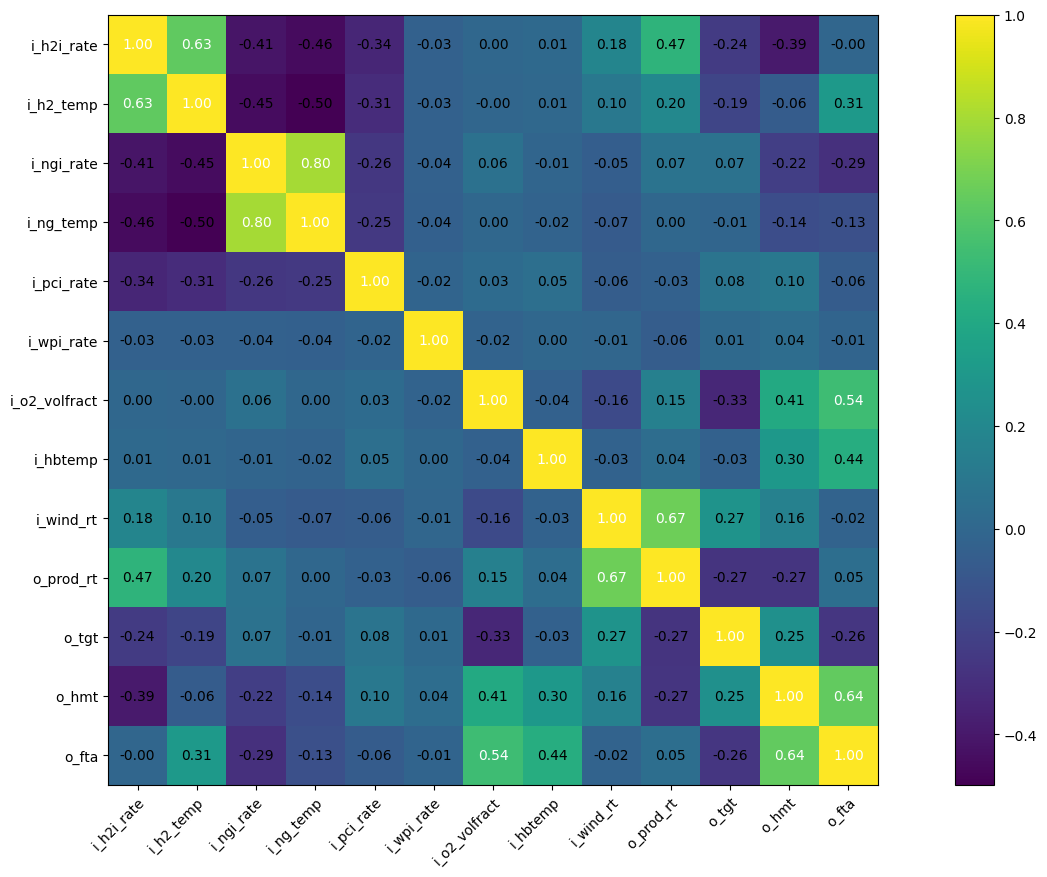

In [11]:


PDFshapingOBJ.list_of_selected_column_names = ['i_h2i_rate','i_h2_temp','i_ngi_rate','i_ng_temp','i_pci_rate',
                    'i_wpi_rate','i_o2_volfract',
                    'i_hbtemp','i_wind_rt','o_prod_rt', 'o_tgt', 'o_hmt','o_fta']



PDFshapingOBJ.print_correlation_coefficients()


In [12]:

PDFshapingOBJ.convert_pd_data_to_numpy()


[[1
  'H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-7_SGI-0_SGT-0_SGC_0 '
  0 ... 63.5 4050.0 1800.0]
 [2
  'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-1_SGI-0_SGT-0_SGC_0 '
  0 ... 60.6 4060.0 1850.0]
 [3
  'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  0 ... 60.8 4080.0 1850.0]
 ...
 [4997
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1600_WR-230_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  30 ... 57.1 11700.0 2380.0]
 [4998
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1480_WR-230_MHB-5.7_BM-3_SGI-0_SGT-0_SGC_0 '
  30 ... 55.7 11800.0 2310.0]
 [4999
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1480_WR-230_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  30 ... 56.2 11800.0 2310.0]]
(4999, 41)


In [13]:

PDFshapingOBJ.gen_X_y_for_selected_indeces(  
                   inputs = [ 2, 3, 5, 6, 8, 9, 10  ] , 
                   outputs= [ 27, 29, 39, 40 ]   
)



7
4


In [14]:

print(PDFshapingOBJ.X.shape)
print(PDFshapingOBJ.y.shape)


(4999, 7)
(4999, 4)


In [15]:

PDFshapingOBJ.random_seed = int( random.random() * 100  )         ## defautl is 42


In [16]:

PDFshapingOBJ.split_np_data_train_test(selected_test_size=0.2)


(3999, 7)
(1000, 7)
(3999, 4)
(1000, 4)


In [17]:

PDFshapingOBJ.convert_dataset_from_np_to_torch()


In [18]:

PDFshapingOBJ.standardize_X_scales()
PDFshapingOBJ.standardize_y_scales()


In [19]:


PDFshapingOBJ.gen_Dataloader_train()

PDFshapingOBJ.train_dl



## Model Forward ( 7x4 )


In [20]:


#############################################################
##   F1      plus       F2
## Linear     +      Nonlinear

class F1plusF2_SIO_Forward(nn.Module):
    ## initialize the layers
    def __init__(self, x_means, x_deviations, y_means, y_deviations,  device='cuda'):
        super().__init__()
        self.device = device
        
        ## self.x_means      = x_means
        ## self.x_deviations = x_deviations
        ## self.y_means      = y_means
        ## self.y_deviations = y_deviations
        
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)
        
        
        
        ## F1
        self.f1_linear1 = nn.Linear(7, 4)       
        
        ## F2
        self.f2_linear1 = nn.Linear(7, 10)
        self.f2_act1    = nn.Sigmoid()                    ## Tanh()                       
        self.f2_linear2 = nn.Linear(10, 4)       
        self.f2_dropout = nn.Dropout(0.25)
        
        # Move model to device
        self.to(self.device)
        
        
    ## perform inference
    def forward(self, x):
        x = x.to(self.device)
        x = (x - self.x_means) / self.x_deviations
        
        ## F1
        f1 = self.f1_linear1(x)
        
        ## F2
        f2 = self.f2_linear1(x)
        f2 = self.f2_act1(f2)
        f2 = self.f2_dropout(f2)
        f2 = self.f2_linear2(f2)
        
        
        y_scaled   = f1 + f2
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    




In [21]:

n_inputs  = 7
n_outputs = 4





    
class ResidualNet_Forward(nn.Module):
    def __init__(self, x_means, x_deviations, y_means, y_deviations, dropout_rate=0.1, device='cuda'):
        
        super().__init__()
        self.device = device
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)

     
        self.fc1  = nn.Linear(n_inputs, 64)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(64, 64)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)

        self.fc3 = nn.Linear(64, n_outputs)

        # If input_dim ≠ 64, project for residual addition
        self.input_proj = nn.Linear(n_inputs, 64) if n_inputs != 64 else nn.Identity()
        
        # Move model to device
        self.to(self.device)
        

    def forward(self, x):
        x  = x.to(self.device)
        x  = (x - self.x_means) / self.x_deviations
        x0 = self.input_proj(x)
        x1 = self.dropout1(self.act1(self.fc1(x)))
        x2 = self.dropout2(self.act2(self.fc2(x1)))
        x_res = x2 + x0
        y_scaled = self.fc3(x_res)
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    

    


In [22]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## model_Forward     = F1plusF2_SIO_Forward(

model_Forward     =     ResidualNet_Forward(
                         PDFshapingOBJ.x_means, 
                         PDFshapingOBJ.x_deviations, 
                         PDFshapingOBJ.y_means, 
                         PDFshapingOBJ.y_deviations,
                         device=device  # pass device into the model
    
)

optimizer = optim.Adam(model_Forward.parameters(), lr=0.001)
loss_fn   = nn.MSELoss()



In [23]:

model_Forward.train()

for epoch in range(1000):
    for xb, yb in PDFshapingOBJ.train_dl:
        
        xb = xb.to(model_Forward.device)
        yb = yb.to(model_Forward.device)
        
        optimizer.zero_grad()
        pred_descaled, pred_scaled = model_Forward(xb)
        loss = loss_fn(pred_scaled, yb)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print(epoch, ".....", loss.item() ) 
    



0 ..... 0.2713851034641266
100 ..... 0.21115241944789886
200 ..... 0.11651971191167831
300 ..... 0.4033905267715454
400 ..... 0.1802433282136917
500 ..... 0.11401615291833878
600 ..... 0.05109155550599098
700 ..... 0.15991324186325073
800 ..... 0.16387473046779633
900 ..... 0.06015809625387192


In [24]:

print("=== SANITY CHECK: SCALING ===")
print("y_means:", PDFshapingOBJ.y_means)
print("y_deviations:", PDFshapingOBJ.y_deviations)

print("===============================================")

print("x_means:", PDFshapingOBJ.x_means)
print("x_deviations:", PDFshapingOBJ.x_deviations)


=== SANITY CHECK: SCALING ===
y_means: tensor([[  97.8878, 1292.4460, 8446.5898, 2307.1396]])
y_deviations: tensor([[  50.8324,  525.5093, 1510.8268,  211.5773]])
x_means: tensor([[  12.5106,   18.6122,   41.3011,   25.5684,  271.7929, 1438.0875,
          198.6584]])
x_deviations: tensor([[ 15.2173,  45.3473,  46.6072,   3.3044, 363.2845, 157.3618,  26.5601]])


In [25]:

print(PDFshapingOBJ.y_means -  PDFshapingOBJ.y_deviations)
print(PDFshapingOBJ.y_means +  PDFshapingOBJ.y_deviations)


tensor([[  47.0554,  766.9368, 6935.7632, 2095.5623]])
tensor([[ 148.7202, 1817.9553, 9957.4170, 2518.7170]])



## Generate Data based on forward model trained on just real data



## Constraints Optimization



* desired output requirements
* Raceway flame temp 2600k - 2700K.......... 'o_fta')
* Hot metal temp      1800 - 1830K...........
* Top gas temp         70 - 80C............
* production rate , 39 



In [26]:


def gen_synthetic_samples_from_RealHong():
  

    sampled_input_dist  = PDFshapingOBJ.sample_input_from_dist_fn()
    

    model_Forward.eval()
    with torch.no_grad():
        
        final_input     = sampled_input_dist
      
        final_output, _ = model_Forward( final_input )

        
    final_input_np     = final_input.cpu().numpy()
    final_output_np    = final_output.cpu().numpy()
    

    os.makedirs("SyntheticCorpus", exist_ok=True)

    
    for i in range(final_input_np.shape[0]):
        
        ####################################################
       
        clamp_min_val   = np.round(final_input_np[i], 3)
        
        final_input_val = np.round(final_input_np[i], 3)
        
        clamp_max_val   = np.round(final_input_np[i], 3)
        
        ####################################################
    
    
        lower_bounds_val = np.round(final_output_np[i], 3)
        
        final_output_val = np.round(final_output_np[i], 3)
        
        upper_bounds_val = np.round(final_output_np[i], 3)
        
        ####################################################
    
        rec = {
            "clamp_min":        clamp_min_val.tolist(),
            "final_input":      final_input_val.tolist(),
            "clamp_max":        clamp_max_val.tolist(),
            "lower_bounds_glob": (lower_bounds_val.tolist()
                              if hasattr(lower_bounds_val, "tolist") else list(lower_bounds_val)),
            "final_output":     final_output_val.tolist(),
            "upper_bounds_glob": (upper_bounds_val.tolist()
                              if hasattr(upper_bounds_val, "tolist") else list(upper_bounds_val)),
        }
        
        fname = f"sample_{time.strftime('%Y%m%d-%H%M%S')}_{uuid.uuid4().hex[:6]}.json"
        with open(os.path.join("SyntheticCorpus", fname), "w", encoding="utf-8") as f:
            json.dump(rec, f, separators=(",", ":"))

    



In [27]:

## 100

for j in range( 10 ):
    gen_synthetic_samples_from_RealHong()
    print("generated so far: ", (j+1)*32 )


generated so far:  32
generated so far:  64
generated so far:  96
generated so far:  128
generated so far:  160
generated so far:  192
generated so far:  224
generated so far:  256
generated so far:  288
generated so far:  320


In [28]:


df_synthetic_data_for_inverse = PDFshapingOBJ.load_synth_folder_to_pandas("SyntheticCorpus", flatten=True)

## df.to_csv("SyntheticCorpus/corpus_flat.csv", index=False) 


In [29]:

df_synthetic_data_for_inverse 


clamp_min_0  clamp_min_1  clamp_min_2  clamp_min_3  clamp_min_4  \
0       20.799000   166.727997    85.307999    43.699001    31.566000   
1        3.083000     0.000000   103.394997     0.000000    26.742001   
2       13.162000     0.000000   135.231003     0.000000    22.988001   
3       41.291000   390.373993    58.916000     0.000000    23.645000   
4        0.000000   143.503006    67.769997    38.255001    30.763000   
...           ...          ...          ...          ...          ...   
2555     0.000000     0.000000    82.510002    24.594000   264.226013   
2556     7.307000    72.175003     0.000000    25.334999   421.160004   
2557    39.723999   101.600998     0.000000    21.648001   704.708008   
2558    26.856001    35.542000   107.925003    20.011000     0.000000   
2559     1.684000     9.212000    25.245001    30.607000   343.346985   

      clamp_min_5  clamp_min_6  final_input_0  final_input_1  final_input_2  \
0     1390.264038   205.110001      20.799000     166.727997      85.307999   
1     1418.810059   195.175995       3.083000       0.000000     103.394997   
2     1454.953003   195.141998      13.162000       0.000000     135.231003   
3     1608.652954   230.033005      41.291000     390.373993      58.916000   
4     1404.297974   207.292999       0.000000     143.503006      67.769997   
...           ...          ...            ...            ...            ...   
2555  1395.490967   228.389999       0.000000       0.000000      82.510002   
2556  1653.911987   222.447006       7.307000      72.175003       0.000000   
2557  1217.704956   164.716003      39.723999     101.600998       0.000000   
2558  1182.650024   203.781006      26.856001      35.542000     107.925003   
2559  1632.430054   160.682999       1.684000       9.212000      25.245001   

      ...  lower_bounds_glob_2  lower_bounds_glob_3  final_output_0  \
0     ...            56.645000         10397.527344     2293.948975   
1     ...           104.790001          7525.728027     2116.649902   
2     ...            85.875999          9370.606445     1963.078003   
3     ...            68.030998         11343.878906     2141.062988   
4     ...            54.702000          9047.318359     2592.258057   
...   ...                  ...                  ...             ...   
2555  ...          9570.335938          2275.414062       98.829002   
2556  ...          9092.972656          2466.604004      103.592003   
2557  ...          8892.161133          1952.907959       70.962997   
2558  ...         10588.624023          1639.145020       84.827003   
2559  ...          6726.330078          2818.392090       57.917999   

      final_output_1  final_output_2  final_output_3  upper_bounds_glob_0  \
0        1105.770996       56.645000    10397.527344          2293.948975   
1        1567.021973      104.790001     7525.728027          2116.649902   
2         411.503998       85.875999     9370.606445          1963.078003   
3         639.513977       68.030998    11343.878906          2141.062988   
4        1756.787964       54.702000     9047.318359          2592.258057   
...              ...             ...             ...                  ...   
2555     1374.092041     9570.335938     2275.414062            98.829002   
2556     1947.078003     9092.972656     2466.604004           103.592003   
2557     -272.565002     8892.161133     1952.907959            70.962997   
2558     -556.492004    10588.624023     1639.145020            84.827003   
2559     2179.787109     6726.330078     2818.392090            57.917999   

      upper_bounds_glob_1  upper_bounds_glob_2  upper_bounds_glob_3  
0             1105.770996            56.645000         10397.527344  
1             1567.021973           104.790001          7525.728027  
2              411.503998            85.875999          9370.606445  
3              639.513977            68.030998         11343.878906  
4             1756.787964            54.702000      


## Train Inverse model, NOT using Forward-Inverse comparison in loss



## Train Real Gen Inverse Model 

* real data gen

## Web application 

Run interactively on the web at: 



## Outputs


* desired output requirements 


(27, 'o_tgt')

(29, 'o_hmt')

(39, 'o_prod_rt')

(40, 'o_fta')



# Inputs



(2, 'i_h2i_rate')

(3, 'i_pci_rate')

(5, 'i_ngi_rate')

(6, 'i_o2_volfract')

(8, 'i_h2_temp')

(9, 'i_hbtemp')

(10, 'i_wind_rt')




In [37]:

import PDFshapingUtils as PDF_tk


In [38]:

PDFshapingOBJ = PDF_tk.PDFshapingUtils()


In [39]:

PDFshapingOBJ.N_error_range = 5         ## 20
PDFshapingOBJ.mean_impulse  = 0.0       ## -7.0      ## 0.0
PDFshapingOBJ.std_impulse   = 0.001     ## 1.0
PDFshapingOBJ.kde_std       = 0.5       ## 0.1       ## 0.5      ## 3.0  ## smaller is better approximation?
PDFshapingOBJ.bandwidth     = 0.2       ## 0.2->more jagged, 2.0->more smooth


In [40]:

PDFshapingOBJ.initializeImpulseGaussian()


In [41]:

## df_synthetic_data_for_inverse = PDFshapingOBJ.load_synth_folder_to_pandas("SyntheticCorpus", flatten=True)


In [42]:


## PDFshapingOBJ.CFD_raw_data = df_synthetic_data_for_inverse 


In [43]:

PDFshapingOBJ.read_csv_file_with_pandas('CFD.16.2025.csv')


In [44]:

PDFshapingOBJ.headers_list = PDFshapingOBJ.CFD_raw_data.columns.values.tolist()


In [45]:

PDFshapingOBJ.CFD_raw_data


index                                          case name  i_h2i_rate  \
0         1  H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HB...           0   
1         2  H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...           0   
2         3  H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...           0   
3         4  H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...           0   
4         5  H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...           0   
...     ...                                                ...         ...   
4994   4995  H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...          30   
4995   4996  H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...          30   
4996   4997  H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...          30   
4997   4998  H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...          30   
4998   4999  H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...          30   

      i_pci_rate  i_wpi_rate  i_ngi_rate  i_o2_volfract  i_ng_temp  i_h2_temp  \
0              0           0         120             21        300          0   
1              0           0         100             21        300          0   
2              0           0         100             21        300          0   
3              0           0         100             21        300          0   
4              0           0         100             21        300          0   
...          ...         ...         ...            ...        ...        ...   
4994           0           0          80             30        300        300   
4995           0           0          80             30        300        300   
4996           0           0          80             30        300        300   
4997           0           0          80             30        300        300   
4998           0           0          80             30        300        300   

      i_hbtemp  ...  o_h2o_sollos  o_feo_sollos  o_hm_rt  o_mw_rt  o_wf_rt  \
0         1200  ...          20.0          44.9    122.0    264.0    687.0   
1         1200  ...          18.5          52.6    122.0    265.0    684.0   
2         1200  ...          19.6          50.9    123.0    266.0    690.0   
3         1200  ...          19.2          52.2    124.0    268.0    690.0   
4         1200  ...          19.2          52.4    124.0    268.0    695.0   
...        ...  ...           ...           ...      ...      ...      ...   
4994      1600  ...          18.7          40.3    353.0    763.0   2190.0   
4995      1480  ...          18.7          40.7    353.0    763.0   2190.0   
4996      1600  ...          19.2          37.5    353.0    763.0   2230.0   
4997      1480  ...          17.6          39.8    355.0    768.0   2220.0   
4998      1480  ...          16.7          38.3    357.0    770.0   2280.0   

      o_hm_h2share  o_mw_h2share  o_wf_h2share  o_prod_rt   o_fta  
0             31.6          26.7          63.5     4050.0  1800.0  
1             27.9          23.4          60.6     4060.0  1850.0  
2             27.7          23.5          60.8     4080.0  1850.0  
3             27.7          23.2          60.6     4090.0  1850.0  
4             27.7          23.2          60.7     4110.0  1850.0  
...            ...           ...           ...        ...     ...  
4994          34.0          20.5          56.7    11700.0  2380.0  
4995          33.8          20.4          56.8    11700.0  2310.0  
4996          33.6          20.4          57.1    11700.0  2380.0  
4997          34.0          20.0          55.7    11800.0  2310.0  
4998          33.9          19.9          56.2    11800.0  2310.0  

[4999 rows x 41 columns]

In [46]:

PDFshapingOBJ.print_headers_list()


['index', 'case name', 'i_h2i_rate', 'i_pci_rate', 'i_wpi_rate', 'i_ngi_rate', 'i_o2_volfract', 'i_ng_temp', 'i_h2_temp', 'i_hbtemp', 'i_wind_rt', 'i_blastH2O', 'i_BdnH2O', 'i_sgi_rate', 'i_sgtemp', 'i_sgi_H2COratio', 'i_sgi_ReProRatio', 'o_tuy_velo', 'o_tuy_temp', 'o_burn', 'o_delp', 'o_co_vf', 'o_co2_vf', 'o_h2_vf', 'o_n2_vf', 'o_co_util', 'o_h2_util', 'o_tgt', 'o_coke_rt', 'o_hmt', 'o_co2_sollos', 'o_h2o_sollos', 'o_feo_sollos', 'o_hm_rt', 'o_mw_rt', 'o_wf_rt', 'o_hm_h2share', 'o_mw_h2share', 'o_wf_h2share', 'o_prod_rt', 'o_fta']
41
(0, 'index')
(1, 'case name')
(2, 'i_h2i_rate')
(3, 'i_pci_rate')
(4, 'i_wpi_rate')
(5, 'i_ngi_rate')
(6, 'i_o2_volfract')
(7, 'i_ng_temp')
(8, 'i_h2_temp')
(9, 'i_hbtemp')
(10, 'i_wind_rt')
(11, 'i_blastH2O')
(12, 'i_BdnH2O')
(13, 'i_sgi_rate')
(14, 'i_sgtemp')
(15, 'i_sgi_H2COratio')
(16, 'i_sgi_ReProRatio')
(17, 'o_tuy_velo')
(18, 'o_tuy_temp')
(19, 'o_burn')
(20, 'o_delp')
(21, 'o_co_vf')
(22, 'o_co2_vf')
(23, 'o_h2_vf')
(24, 'o_n2_vf')
(25, 'o_co_ut

In [47]:


PDFshapingOBJ.convert_pd_data_to_numpy()


[[1
  'H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-7_SGI-0_SGT-0_SGC_0 '
  0 ... 63.5 4050.0 1800.0]
 [2
  'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-1_SGI-0_SGT-0_SGC_0 '
  0 ... 60.6 4060.0 1850.0]
 [3
  'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  0 ... 60.8 4080.0 1850.0]
 ...
 [4997
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1600_WR-230_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  30 ... 57.1 11700.0 2380.0]
 [4998
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1480_WR-230_MHB-5.7_BM-3_SGI-0_SGT-0_SGC_0 '
  30 ... 55.7 11800.0 2310.0]
 [4999
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1480_WR-230_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  30 ... 56.2 11800.0 2310.0]]
(4999, 41)


In [48]:

'''

PDFshapingOBJ.gen_X_y_for_selected_indeces(  
                   inputs = [ 25, 26, 27, 28 ] ,  
                   outputs= [  7, 8, 9, 10, 11, 12, 13 ]   
)


'''


PDFshapingOBJ.gen_X_y_for_selected_indeces(  
                   inputs= [ 27, 29, 39, 40 ]  ,
                   outputs = [ 2, 3, 5, 6, 8, 9, 10  ] 
)


  


4
7


In [49]:


print(PDFshapingOBJ.X.shape)
print(PDFshapingOBJ.y.shape)


(4999, 4)
(4999, 7)


In [50]:

## PDFshapingOBJ.random_seed = int( random.random() * 100  )         ## defautl is 42

PDFshapingOBJ.random_seed = 42


In [51]:

PDFshapingOBJ.split_np_data_train_test(selected_test_size=0.2)


(3999, 4)
(1000, 4)
(3999, 7)
(1000, 7)


In [52]:

PDFshapingOBJ.convert_dataset_from_np_to_torch()


In [53]:


PDFshapingOBJ.standardize_X_scales()
PDFshapingOBJ.standardize_y_scales()


In [54]:


PDFshapingOBJ.gen_Dataloader_train()

PDFshapingOBJ.train_dl



In [55]:


n_inputs  = 4
n_outputs = 7



class ResidualNet_Inverse(nn.Module):
    def __init__(self, x_means, x_deviations, y_means, y_deviations, dropout_rate=0.1, device='cuda'):
        
        super().__init__()
        self.device = device
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)

     
        self.fc1  = nn.Linear(n_inputs, 64)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(64, 64)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)

        self.fc3 = nn.Linear(64, n_outputs)

        # If input_dim ≠ 64, project for residual addition
        self.input_proj = nn.Linear(n_inputs, 64) if n_inputs != 64 else nn.Identity()
        
        # Move model to device
        self.to(self.device)
        

    def forward(self, x):
        x  = x.to(self.device)
        x  = (x - self.x_means) / self.x_deviations
        x0 = self.input_proj(x)
        x1 = self.dropout1(self.act1(self.fc1(x)))
        x2 = self.dropout2(self.act2(self.fc2(x1)))
        x_res = x2 + x0
        y_scaled = self.fc3(x_res)
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    



In [56]:




#############################################################
##   F1      plus       F2
## Linear     +      Nonlinear

class F1plusF2_SIO_Inverse(nn.Module):
    ## initialize the layers
    def __init__(self, x_means, x_deviations, y_means, y_deviations,  device='cuda'):
        super().__init__()
        self.device = device
        
        ## self.x_means      = x_means
        ## self.x_deviations = x_deviations
        ## self.y_means      = y_means
        ## self.y_deviations = y_deviations
        
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)
        
        
        
        ## F1
        self.f1_linear1 = nn.Linear(4, 7)       
        
        ## F2
        self.f2_linear1 = nn.Linear(4, 10)
        self.f2_act1    = nn.Sigmoid()                    ## Tanh()                       
        self.f2_linear2 = nn.Linear(10, 7)       
        self.f2_dropout = nn.Dropout(0.25)
        
        # Move model to device
        self.to(self.device)
        
        
    ## perform inference
    def forward(self, x):
        x = x.to(self.device)
        x = (x - self.x_means) / self.x_deviations
        
        ## F1
        f1 = self.f1_linear1(x)
        
        ## F2
        f2 = self.f2_linear1(x)
        f2 = self.f2_act1(f2)
        f2 = self.f2_dropout(f2)
        f2 = self.f2_linear2(f2)
        
        
        y_scaled   = f1 + f2
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    




In [57]:


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## model_Inverse     = F1plusF2_SIO_Inverse(

model_Inverse     =     ResidualNet_Inverse(
                        PDFshapingOBJ.x_means, 
                        PDFshapingOBJ.x_deviations, 
                        PDFshapingOBJ.y_means, 
                        PDFshapingOBJ.y_deviations,
                        device=device  # pass device into the model
    
)

optimizer = optim.Adam(model_Inverse.parameters(), lr=0.001)
loss_fn   = nn.MSELoss()



In [58]:


## Forward -> 7x4

## Inverse -> 4x7


model_Inverse.train()

for epoch in range(1000):
    for xb, yb in PDFshapingOBJ.train_dl:
        
        xb = xb.to(model_Inverse.device)
        yb = yb.to(model_Inverse.device)
        
        optimizer.zero_grad()
        pred_descaled, pred_scaled = model_Inverse(xb)
        
        
        loss = loss_fn(pred_scaled, yb)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print(epoch, ".....", loss.item() ) 
    




0 ..... 0.5457446575164795
100 ..... 0.33891814947128296
200 ..... 0.21065708994865417
300 ..... 0.33382001519203186
400 ..... 0.463466078042984
500 ..... 0.4010256826877594
600 ..... 0.6741083264350891
700 ..... 0.5353151559829712
800 ..... 0.5091837048530579
900 ..... 0.5365967154502869


In [59]:


print("=== SANITY CHECK: SCALING ===")
print("y_means:", PDFshapingOBJ.y_means)
print("y_deviations:", PDFshapingOBJ.y_deviations)

print("===============================================")

print("x_means:", PDFshapingOBJ.x_means)
print("x_deviations:", PDFshapingOBJ.x_deviations)




=== SANITY CHECK: SCALING ===
y_means: tensor([[  12.3356,   19.4929,   40.9437,   25.6174,  267.2168, 1439.6299,
          198.7547]])
y_deviations: tensor([[ 15.2321,  46.1241,  46.5318,   3.3248, 361.3148, 158.0617,  26.5062]])
x_means: tensor([[  97.5782, 1304.0294, 8451.0449, 2310.0466]])
x_deviations: tensor([[  50.0365,  519.6542, 1508.7687,  210.7183]])


In [60]:

print( PDFshapingOBJ.X_test_tr[0] )
print( PDFshapingOBJ.y_test_tr[0] )



tensor([  98.6000, 1460.0000, 5360.0000, 2130.0000])
tensor([   0.,    0.,   41.,   24.,    0., 1200.,  160.])


In [61]:


print( PDFshapingOBJ.X_test_tr.shape )
print( PDFshapingOBJ.y_test_tr.shape )

with torch.no_grad():
    
    pred_test_descaled, pred_test_scaled = model_Inverse(  PDFshapingOBJ.X_test_tr  )


torch.Size([1000, 4])
torch.Size([1000, 7])


In [62]:


y_true = PDFshapingOBJ.y_test_tr.detach().cpu().numpy()

y_pred = pred_test_descaled.detach().cpu().numpy()  # or use descaled pair

mae  = mean_absolute_error(y_true, y_pred, multioutput='raw_values')
rmse = mean_squared_error( y_true, y_pred, squared=False, multioutput='raw_values')
r2   = r2_score(           y_true, y_pred, multioutput='raw_values')

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)
print("Overall averages:", 
      mae.mean(), rmse.mean(), r2.mean())



MAE: [  7.959274   15.133749   28.000355    1.4745741 187.85002   103.77412
   6.272073 ]
RMSE: [ 10.681358   29.796713   35.494034    1.9061015 282.84982   130.81273
   8.686536 ]
R2: [0.51267895 0.49981285 0.42222359 0.66659645 0.375574   0.29636529
 0.89451889]
Overall averages: 50.066307 71.461044 0.5239671480560095


In [63]:

r2   = r2_score(           y_true, y_pred, multioutput='raw_values')
r2



array([0.51267895, 0.49981285, 0.42222359, 0.66659645, 0.375574  ,
       0.29636529, 0.89451889])

In [64]:

r2.mean()



0.5239671480560095

In [65]:

print('Testing R**2 - descaled:', r2_score( y_pred, y_true   )  )


Testing R**2 - descaled: 0.0021614047117822777


In [66]:

print('Testing R**2 - descaled:', r2_score( y_true,  y_pred   )  )


Testing R**2 - descaled: 0.5239671480560095


In [67]:

PDFshapingOBJ.r2_score_torch(PDFshapingOBJ.y_test_tr.to(PDFshapingOBJ.device), pred_test_descaled).mean()


tensor(0.5240, device='cuda:0')

In [68]:


import torch

# Your trained model
model_Inverse.eval().float()


dummy_input = torch.randn(1, 4, dtype=torch.float32)

# Export to ONNX (single output called "output1")
torch.onnx.export(
    model_Inverse,
    dummy_input,
    "ONNXmodels/F1F2_Inverse_HongRealGen.onnx",
    input_names=["input1"],
    output_names=["output1"],
    opset_version=15,              # fine for onnxruntime-web
    do_constant_folding=True,
    dynamic_axes={
        "input1": {0: "batch"},
        "output1": {0: "batch"}
    }
)
print("ONNX model saved")



ONNX model saved



## Train Inverse model, YES to using Forward-Inverse comparison in loss


In [94]:

import PDFshapingUtils as PDF_tk


In [95]:

PDFshapingOBJ = PDF_tk.PDFshapingUtils()


In [96]:


PDFshapingOBJ.N_error_range = 5         ## 20
PDFshapingOBJ.mean_impulse  = 0.0       ## -7.0      ## 0.0
PDFshapingOBJ.std_impulse   = 0.001     ## 1.0
PDFshapingOBJ.kde_std       = 0.5       ## 0.1       ## 0.5      ## 3.0  ## smaller is better approximation?
PDFshapingOBJ.bandwidth     = 0.2       ## 0.2->more jagged, 2.0->more smooth



In [97]:

PDFshapingOBJ.initializeImpulseGaussian()


In [98]:

## df_synthetic_data_for_inverse = PDFshapingOBJ.load_synth_folder_to_pandas("SyntheticCorpus", flatten=True)

## PDFshapingOBJ.CFD_raw_data = df_synthetic_data_for_inverse 



In [99]:

PDFshapingOBJ.read_csv_file_with_pandas('CFD.16.2025.csv')


In [100]:

PDFshapingOBJ.headers_list = PDFshapingOBJ.CFD_raw_data.columns.values.tolist()


In [101]:

PDFshapingOBJ.CFD_raw_data


index                                          case name  i_h2i_rate  \
0         1  H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HB...           0   
1         2  H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...           0   
2         3  H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...           0   
3         4  H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...           0   
4         5  H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...           0   
...     ...                                                ...         ...   
4994   4995  H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...          30   
4995   4996  H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...          30   
4996   4997  H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...          30   
4997   4998  H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...          30   
4998   4999  H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...          30   

      i_pci_rate  i_wpi_rate  i_ngi_rate  i_o2_volfract  i_ng_temp  i_h2_temp  \
0              0           0         120             21        300          0   
1              0           0         100             21        300          0   
2              0           0         100             21        300          0   
3              0           0         100             21        300          0   
4              0           0         100             21        300          0   
...          ...         ...         ...            ...        ...        ...   
4994           0           0          80             30        300        300   
4995           0           0          80             30        300        300   
4996           0           0          80             30        300        300   
4997           0           0          80             30        300        300   
4998           0           0          80             30        300        300   

      i_hbtemp  ...  o_h2o_sollos  o_feo_sollos  o_hm_rt  o_mw_rt  o_wf_rt  \
0         1200  ...          20.0          44.9    122.0    264.0    687.0   
1         1200  ...          18.5          52.6    122.0    265.0    684.0   
2         1200  ...          19.6          50.9    123.0    266.0    690.0   
3         1200  ...          19.2          52.2    124.0    268.0    690.0   
4         1200  ...          19.2          52.4    124.0    268.0    695.0   
...        ...  ...           ...           ...      ...      ...      ...   
4994      1600  ...          18.7          40.3    353.0    763.0   2190.0   
4995      1480  ...          18.7          40.7    353.0    763.0   2190.0   
4996      1600  ...          19.2          37.5    353.0    763.0   2230.0   
4997      1480  ...          17.6          39.8    355.0    768.0   2220.0   
4998      1480  ...          16.7          38.3    357.0    770.0   2280.0   

      o_hm_h2share  o_mw_h2share  o_wf_h2share  o_prod_rt   o_fta  
0             31.6          26.7          63.5     4050.0  1800.0  
1             27.9          23.4          60.6     4060.0  1850.0  
2             27.7          23.5          60.8     4080.0  1850.0  
3             27.7          23.2          60.6     4090.0  1850.0  
4             27.7          23.2          60.7     4110.0  1850.0  
...            ...           ...           ...        ...     ...  
4994          34.0          20.5          56.7    11700.0  2380.0  
4995          33.8          20.4          56.8    11700.0  2310.0  
4996          33.6          20.4          57.1    11700.0  2380.0  
4997          34.0          20.0          55.7    11800.0  2310.0  
4998          33.9          19.9          56.2    11800.0  2310.0  

[4999 rows x 41 columns]

In [102]:

PDFshapingOBJ.print_headers_list()


['index', 'case name', 'i_h2i_rate', 'i_pci_rate', 'i_wpi_rate', 'i_ngi_rate', 'i_o2_volfract', 'i_ng_temp', 'i_h2_temp', 'i_hbtemp', 'i_wind_rt', 'i_blastH2O', 'i_BdnH2O', 'i_sgi_rate', 'i_sgtemp', 'i_sgi_H2COratio', 'i_sgi_ReProRatio', 'o_tuy_velo', 'o_tuy_temp', 'o_burn', 'o_delp', 'o_co_vf', 'o_co2_vf', 'o_h2_vf', 'o_n2_vf', 'o_co_util', 'o_h2_util', 'o_tgt', 'o_coke_rt', 'o_hmt', 'o_co2_sollos', 'o_h2o_sollos', 'o_feo_sollos', 'o_hm_rt', 'o_mw_rt', 'o_wf_rt', 'o_hm_h2share', 'o_mw_h2share', 'o_wf_h2share', 'o_prod_rt', 'o_fta']
41
(0, 'index')
(1, 'case name')
(2, 'i_h2i_rate')
(3, 'i_pci_rate')
(4, 'i_wpi_rate')
(5, 'i_ngi_rate')
(6, 'i_o2_volfract')
(7, 'i_ng_temp')
(8, 'i_h2_temp')
(9, 'i_hbtemp')
(10, 'i_wind_rt')
(11, 'i_blastH2O')
(12, 'i_BdnH2O')
(13, 'i_sgi_rate')
(14, 'i_sgtemp')
(15, 'i_sgi_H2COratio')
(16, 'i_sgi_ReProRatio')
(17, 'o_tuy_velo')
(18, 'o_tuy_temp')
(19, 'o_burn')
(20, 'o_delp')
(21, 'o_co_vf')
(22, 'o_co2_vf')
(23, 'o_h2_vf')
(24, 'o_n2_vf')
(25, 'o_co_ut

In [103]:

PDFshapingOBJ.convert_pd_data_to_numpy()


[[1
  'H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-7_SGI-0_SGT-0_SGC_0 '
  0 ... 63.5 4050.0 1800.0]
 [2
  'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-1_SGI-0_SGT-0_SGC_0 '
  0 ... 60.6 4060.0 1850.0]
 [3
  'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  0 ... 60.8 4080.0 1850.0]
 ...
 [4997
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1600_WR-230_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  30 ... 57.1 11700.0 2380.0]
 [4998
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1480_WR-230_MHB-5.7_BM-3_SGI-0_SGT-0_SGC_0 '
  30 ... 55.7 11800.0 2310.0]
 [4999
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1480_WR-230_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  30 ... 56.2 11800.0 2310.0]]
(4999, 41)


In [104]:

'''

PDFshapingOBJ.gen_X_y_for_selected_indeces(  
                   inputs = [ 25, 26, 27, 28 ] ,  
                   outputs= [  7, 8, 9, 10, 11, 12, 13 ]   
)

'''




PDFshapingOBJ.gen_X_y_for_selected_indeces(  
                   inputs= [ 27, 29, 39, 40 ]  ,
                   outputs = [ 2, 3, 5, 6, 8, 9, 10  ] 
)



4
7


In [105]:


print(PDFshapingOBJ.X.shape)
print(PDFshapingOBJ.y.shape)


(4999, 4)
(4999, 7)


In [106]:

## PDFshapingOBJ.random_seed = int( random.random() * 100  )         ## defautl is 42

PDFshapingOBJ.random_seed = 42


In [107]:

PDFshapingOBJ.split_np_data_train_test(selected_test_size=0.2)


(3999, 4)
(1000, 4)
(3999, 7)
(1000, 7)


In [108]:

PDFshapingOBJ.convert_dataset_from_np_to_torch()


In [109]:


PDFshapingOBJ.standardize_X_scales()
PDFshapingOBJ.standardize_y_scales()


In [110]:

PDFshapingOBJ.gen_Dataloader_train()

PDFshapingOBJ.train_dl


In [111]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## model_Inverse_2     = F1plusF2_SIO_Inverse(

model_Inverse_2     =     ResidualNet_Inverse(
                        PDFshapingOBJ.x_means, 
                        PDFshapingOBJ.x_deviations, 
                        PDFshapingOBJ.y_means, 
                        PDFshapingOBJ.y_deviations,
                        device=device  # pass device into the model
    
)

optimizer = optim.Adam(model_Inverse_2.parameters(), lr=0.001)
loss_fn   = nn.MSELoss()


In [112]:

## Forward -> 7x4

## Inverse -> 4x7


########################

model_Forward.eval()
for param in model_Forward.parameters():
    param.requires_grad = False


########################


model_Inverse_2.train()

for epoch in range(1000):
    for xb, yb in PDFshapingOBJ.train_dl:
        
        xb = xb.to(model_Inverse_2.device)
        yb = yb.to(model_Inverse_2.device)
        
        optimizer.zero_grad()
        
        ## [7]                                       [4]
        pred_descaled, pred_scaled = model_Inverse_2(xb)
        
        ###########################
        
        ##   [4]                [4]                              [7]
        Fwd_pred_descaled, Fwd_pred_scaled = model_Forward(  pred_descaled   )
        
        FWD_x_means =      PDFshapingOBJ.x_means.to(   model_Inverse_2.device    )
        FWD_y_devs  = PDFshapingOBJ.x_deviations.to(   model_Inverse_2.device    )
        
        xb_scaled_FWD = (xb - FWD_x_means) / FWD_y_devs
       
        ###########################
        
        alpha = 0.1 * max(0, 1 - epoch / 500)

        
        ## alpha = 0.01
        
        loss = (1-alpha) * loss_fn(pred_scaled, yb) + alpha * loss_fn(Fwd_pred_scaled, xb_scaled_FWD)
        
        
        loss.backward()
        optimizer.step()
        
   
        
    if epoch % 100 == 0:
        print(epoch, ".....", loss.item() ) 
        
        ##################################################
        inv_loss = loss_fn(pred_scaled, yb)
        fwd_loss = loss_fn(Fwd_pred_scaled, xb_scaled_FWD)
        print(f"Epoch {epoch} | inv: {inv_loss.item():.4f} | fwd: {fwd_loss.item():.4f}")
        print("===========================================")
        ##################################################
        


0 ..... 0.6503350138664246
Epoch 0 | inv: 0.6892 | fwd: 0.3010
100 ..... 0.2807673513889313
Epoch 100 | inv: 0.2815 | fwd: 0.2722
200 ..... 0.423862099647522
Epoch 200 | inv: 0.4258 | fwd: 0.3939
300 ..... 0.30489668250083923
Epoch 300 | inv: 0.3123 | fwd: 0.1274
400 ..... 0.7200894355773926
Epoch 400 | inv: 0.7281 | fwd: 0.3282
500 ..... 0.3411805033683777
Epoch 500 | inv: 0.3412 | fwd: 0.3189
600 ..... 0.4998522698879242
Epoch 600 | inv: 0.4999 | fwd: 0.1311
700 ..... 0.6071738600730896
Epoch 700 | inv: 0.6072 | fwd: 0.1455
800 ..... 0.5095916986465454
Epoch 800 | inv: 0.5096 | fwd: 0.3545
900 ..... 0.5304611921310425
Epoch 900 | inv: 0.5305 | fwd: 0.6362


In [114]:


print("=== SANITY CHECK: SCALING ===")
print("y_means:", PDFshapingOBJ.y_means)
print("y_deviations:", PDFshapingOBJ.y_deviations)

print("===============================================")

print("x_means:", PDFshapingOBJ.x_means)
print("x_deviations:", PDFshapingOBJ.x_deviations)


=== SANITY CHECK: SCALING ===
y_means: tensor([[  12.3356,   19.4929,   40.9437,   25.6174,  267.2168, 1439.6299,
          198.7547]])
y_deviations: tensor([[ 15.2321,  46.1241,  46.5318,   3.3248, 361.3148, 158.0617,  26.5062]])
x_means: tensor([[  97.5782, 1304.0294, 8451.0449, 2310.0466]])
x_deviations: tensor([[  50.0365,  519.6542, 1508.7687,  210.7183]])


In [115]:

print( PDFshapingOBJ.X_test_tr[0] )
print( PDFshapingOBJ.y_test_tr[0] )



tensor([  98.6000, 1460.0000, 5360.0000, 2130.0000])
tensor([   0.,    0.,   41.,   24.,    0., 1200.,  160.])


In [116]:

print( PDFshapingOBJ.X_test_tr.shape )
print( PDFshapingOBJ.y_test_tr.shape )

with torch.no_grad():
    
    pred_test_descaled, pred_test_scaled = model_Inverse_2(  PDFshapingOBJ.X_test_tr  )


torch.Size([1000, 4])
torch.Size([1000, 7])


In [117]:

y_true = PDFshapingOBJ.y_test_tr.detach().cpu().numpy()

y_pred = pred_test_descaled.detach().cpu().numpy()  # or use descaled pair

mae  = mean_absolute_error(y_true, y_pred, multioutput='raw_values')
rmse = mean_squared_error( y_true, y_pred, squared=False, multioutput='raw_values')
r2   = r2_score(           y_true, y_pred, multioutput='raw_values')

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)
print("Overall averages:", 
      mae.mean(), rmse.mean(), r2.mean())


MAE: [  7.8432407  14.498296   27.370493    1.4469298 177.23201   104.27751
   5.9591923]
RMSE: [ 10.610286   29.254211   35.152554    1.9014424 275.36874   130.9987
   8.649123 ]
R2: [0.51914237 0.51786035 0.43328787 0.66822429 0.4081673  0.2943626
 0.89542549]
Overall averages: 48.375378 70.276436 0.5337814678053526


In [118]:

r2   = r2_score(           y_true, y_pred, multioutput='raw_values')
r2


array([0.51914237, 0.51786035, 0.43328787, 0.66822429, 0.4081673 ,
       0.2943626 , 0.89542549])

In [119]:

r2.mean()


0.5337814678053526

In [120]:

print('Testing R**2 - descaled:', r2_score( y_pred, y_true   )  )


Testing R**2 - descaled: 0.06333175889563554


In [121]:

print('Testing R**2 - descaled:', r2_score( y_true,  y_pred   )  )


Testing R**2 - descaled: 0.5337814678053526


In [122]:

PDFshapingOBJ.r2_score_torch(PDFshapingOBJ.y_test_tr.to(PDFshapingOBJ.device), pred_test_descaled).mean()


tensor(0.5338, device='cuda:0')

In [123]:


import torch

# Your trained model
model_Forward.eval().float()


dummy_input = torch.randn(1, 7, dtype=torch.float32)

# Export to ONNX (single output called "output1")
torch.onnx.export(
    model_Forward,
    dummy_input,
    "ONNXmodels/LEPINE_model_Forward.onnx",
    input_names=["input1"],
    output_names=["output1"],
    opset_version=15,              # fine for onnxruntime-web
    do_constant_folding=True,
    dynamic_axes={
        "input1": {0: "batch"},
        "output1": {0: "batch"}
    }
)
print("ONNX model saved")




ONNX model saved


In [124]:

import torch

# Your trained model
model_Inverse_2.eval().float()


dummy_input = torch.randn(1, 4, dtype=torch.float32)

# Export to ONNX (single output called "output1")

torch.onnx.export(
    model_Inverse_2,
    dummy_input,
    "ONNXmodels/LEPINE_model_Inverse_2.onnx",
    input_names=["input1"],
    output_names=["output1"],
    opset_version=15,              # fine for onnxruntime-web
    do_constant_folding=True,
    dynamic_axes={
        "input1": {0: "batch"},
        "output1": {0: "batch"}
    }
)
print("ONNX model saved")




ONNX model saved



## XGBoost


In [125]:

regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)


In [126]:

regressor.fit(PDFshapingOBJ.X_train, PDFshapingOBJ.y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [127]:

print( len(PDFshapingOBJ.X_train  ))
print( len(PDFshapingOBJ.y_train  ))


3999
3999


In [128]:


print( PDFshapingOBJ.X_train.shape  )
print( PDFshapingOBJ.y_train.shape  )


(3999, 4)
(3999, 7)


In [129]:

y_pred = regressor.predict(PDFshapingOBJ.X_test )


In [130]:

y_pred


array([[  -2.5724683 ,    0.31236222,   54.116337  , ...,   -8.129216  ,
        1428.673     ,  158.8475    ],
       [  12.412817  ,   12.31737   ,   14.637533  , ...,  321.71072   ,
        1484.8362    ,  194.84848   ],
       [  41.361443  ,    3.7721713 ,   33.99264   , ..., 1069.9155    ,
        1594.4838    ,  174.81099   ],
       ...,
       [  39.10926   ,    1.7756758 ,    8.447012  , ..., 1040.5992    ,
        1527.9537    ,  230.80215   ],
       [   8.2827015 ,   26.507128  ,   45.827534  , ...,  127.58128   ,
        1322.796     ,  220.39426   ],
       [  10.523622  ,   32.37206   ,   62.36457   , ...,  235.44582   ,
        1379.2126    ,  218.27373   ]], dtype=float32)

In [131]:

r2_score( PDFshapingOBJ.y_test, y_pred )


0.4917533435940276